### SVM Kernels Indepth Intuition and Practical Explanation

In [23]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])


In [24]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

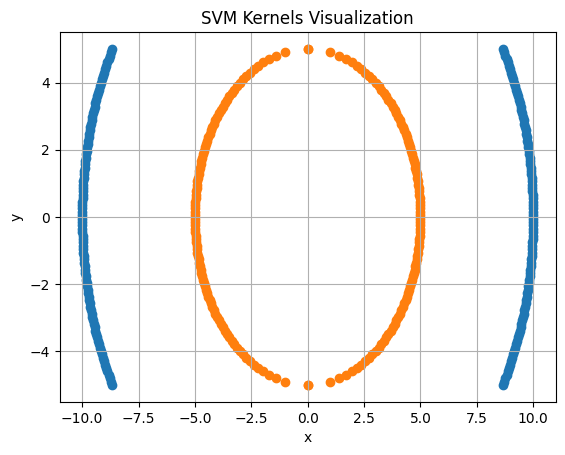

In [25]:
plt.scatter(y,x)
plt.scatter(y1,x1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('SVM Kernels Visualization')
plt.grid()
plt.show()

In [26]:
import pandas as pd

df1 = pd.DataFrame(np.vstack([y,x]).T, columns=['X1', 'X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns=['X1','X2'])
df2['Y'] = 1
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [27]:
## indepedent and dependent variables
X = df.iloc[:,:2]
y = df.Y

In [28]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [29]:
## split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)

In [30]:
y_train

57     0
87     0
357    1
355    1
238    1
      ..
369    1
320    1
15     0
125    0
265    1
Name: Y, Length: 300, dtype: int64

#### Applying Polynomial Kernel (K(x,y) = (x^T + c)^d)

In [31]:
## we need to find the component for the polynomial kernel
## X1,X2, X1_square, X2_square, X1*X2

df['X1_square'] = df['X1']**2
df['X2_square'] = df['X2']**2
df['X1*X2'] = (df['X1']*df['X2'])
df.head(5) 

,X1,X2,Y,X1_square,X2_square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [32]:
## Independent and Dependent Variables

X = df[['X1','X2','X1_square','X2_square','X1*X2']]
y = df['Y']

In [33]:
## train test Split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [34]:
X_train

,X1,X2,X1_square,X2_square,X1*X2
250,4.999745,0.050505,24.997449,0.002551,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
312,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
283,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
323,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,81.570758,18.429242,38.772248
117,-9.445795,3.282828,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,99.936231,0.063769,-2.524447


In [35]:
import plotly.express as px

fig = px.scatter_3d(df,x='X1', y='X2', z='X1*X2', color='Y')

fig.show()


In [36]:
import plotly.express as px

fig = px.scatter_3d(df,x='X1_square', y='X2_square', z='X1*X2', color='Y')

fig.show()


In [37]:
## from the figure above we can see that the data is now linearly separable
## after doing x^2, x^2, x1*x2

from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = classifier.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [ ]:
## if we had not done it like x^2, x^2, x1*x2, then polynomial kernel will work, but if we have found the components, then we can use linear kernel.
classifier = SVC(kernel='poly')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = classifier.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [39]:
classifier = SVC(kernel='rbf')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = classifier.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [40]:
classifier = SVC(kernel='sigmoid')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = classifier.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%
